# Regional Deterministic Prediction System (RDPS)

[webpage](http://weather.gc.ca/grib/grib2_reg_10km_e.html)

### Tasks
1. Download file from dd.weather.gc.ca
2. Use pygrib to open file
3. Visualize data with matplotlib basemap

In [1]:
% matplotlib notebook

import pygrib
import requests
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import os

ImportError: No module named 'pygrib'

In [2]:
url = "http://dd.weather.gc.ca/model_gem_regional/10km/grib2/HH/hhh"

From the documentation on RDPS we want to extract the wind velocity (U, V components) at 10 m.

    266	U Wind Component	10m above ground	UGRD_TGL_10m	metres per second
    267	V Wind Component	10m above ground	VGRD_TGL_10m	metres per second

In [3]:
filename = "CMC_reg_UGRD_TGL_10_ps10km_2016092400_P000.grib2"
url = os.path.join("http://dd.weather.gc.ca/model_gem_regional/10km/grib2/00/000",
                   filename)

In [4]:
r = requests.get(url)

In [5]:
r.status_code

200

In [6]:
r.headers['content-type']

'application/octet-stream'

In [7]:
with open(filename, 'wb') as f:
    f.write(r.content)

In [8]:
# I could cache the file to disk if needed first...

In [9]:
grbs = pygrib.open(filename)

In [10]:
grb = grbs[1]
print(grb)

1:10 metre U wind component:m s**-1 (instant):polar_stereographic:heightAboveGround:level 10 m:fcst time 0 hrs:from 201609240000


In [11]:
print (grb.keys())

['parametersVersion', 'UseEcmfConventions', 'GRIBEX_boustrophedonic', 'hundred', 'globalDomain', 'GRIBEditionNumber', 'grib2divider', 'angularPrecision', 'missingValue', 'ieeeFloats', 'isHindcast', 'section0Length', 'identifier', 'discipline', 'editionNumber', 'totalLength', 'sectionNumber', 'section1Length', 'numberOfSection', 'centre', 'centreDescription', 'subCentre', 'tablesVersion', 'masterDir', 'localTablesVersion', 'significanceOfReferenceTime', 'year', 'month', 'day', 'hour', 'minute', 'second', 'dataDate', 'julianDay', 'dataTime', 'productionStatusOfProcessedData', 'typeOfProcessedData', 'selectStepTemplateInterval', 'selectStepTemplateInstant', 'stepType', 'setCalendarId', 'deleteCalendarId', 'is_uerra', 'sectionNumber', 'grib2LocalSectionPresent', 'sectionNumber', 'gridDescriptionSectionPresent', 'section3Length', 'numberOfSection', 'sourceOfGridDefinition', 'numberOfDataPoints', 'numberOfOctectsForNumberOfPoints', 'interpretationOfNumberOfPoints', 'PLPresent', 'gridDefiniti

In [12]:
#grbs.rewind() # rewind the iterator
from datetime import datetime
grb.analDate

datetime.datetime(2016, 9, 24, 0, 0)

In [13]:
grbs.rewind()
for key in grb.keys():
    print (key)
    if key == 'analDate':
        print (grb.analDate)
    elif key == 'validDate':
        print (grb.validDate)
    else:
        print (grb[key])

parametersVersion
1
UseEcmfConventions
1
GRIBEX_boustrophedonic
0
hundred
[100 100]
globalDomain
g
GRIBEditionNumber
2
grib2divider
1000000
angularPrecision
1000000
missingValue
9999
ieeeFloats
1
isHindcast
0
section0Length
16
identifier
GRIB
discipline
0
editionNumber
2
totalLength
486512
sectionNumber
[1 3 3 4 5 6 7]
section1Length
21
numberOfSection
[1 3 4 5 6 7]
centre
cwao
centreDescription
Canadian Meteorological Service - Montreal
subCentre
0
tablesVersion
4
masterDir
grib2/tables/[tablesVersion]
localTablesVersion
0
significanceOfReferenceTime
1
year
2016
month
9
day
24
hour
0
minute
0
second
0
dataDate
20160924
julianDay
2457655.5
dataTime
0
productionStatusOfProcessedData
0
typeOfProcessedData
af
selectStepTemplateInterval
1
selectStepTemplateInstant
1
stepType
instant
setCalendarId
0
deleteCalendarId
0
is_uerra
0
sectionNumber
[1 3 3 4 5 6 7]
grib2LocalSectionPresent
0
sectionNumber
[1 3 3 4 5 6 7]
gridDescriptionSectionPresent
1
section3Length
65
numberOfSection
[1 3 4 5 6 

In [14]:
grb['analDate']

RuntimeError: b'Key/value not found'

In [15]:
u = grb.values
lats, lons = grb.latlons()

In [16]:
print( 'min/max lat and lon',lats.min(), lats.max(), lons.min(), lons.max())

min/max lat and lon 17.3427261243 89.9561244127 -179.999767655 179.999920394


<IPython.core.display.Javascript object>


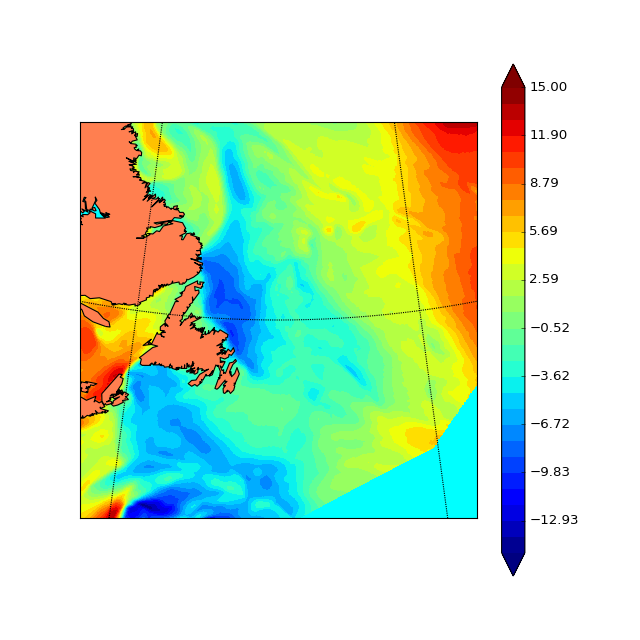

In [20]:
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc',
            lon_0=-50, lat_0=50, 
            height= 2000e3, width=2000e3,
            resolution='l')
m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
# draw parallels and meridians
m.drawparallels(np.arange(-80.,81., 10.))
m.drawmeridians(np.arange(-180.,181., 20.))
m.drawmapboundary(fill_color='aqua')

x,y = m(lons,lats)
m.contourf(x,y,u, np.linspace(-15,15,30),extend='both')
plt.colorbar()

<IPython.core.display.Javascript object>


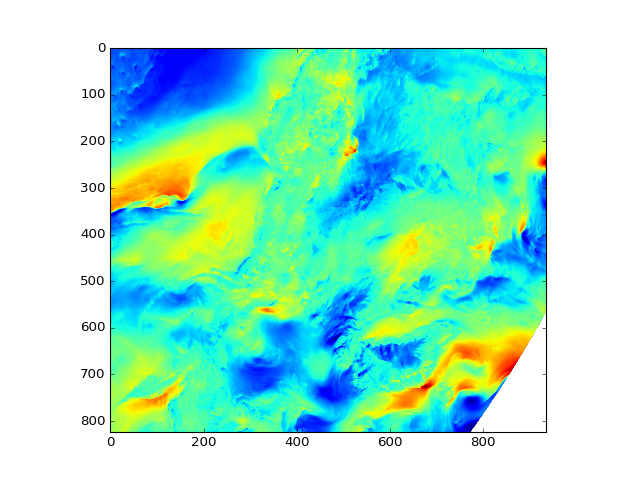

In [31]:
m.